         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...         

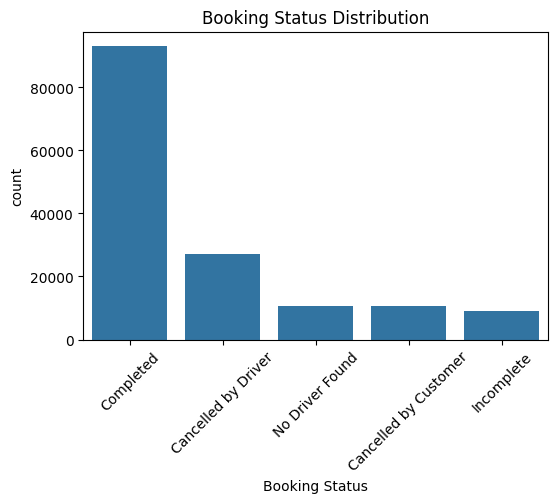

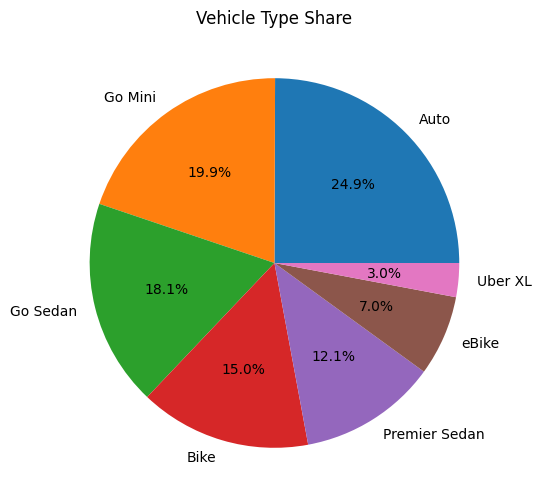

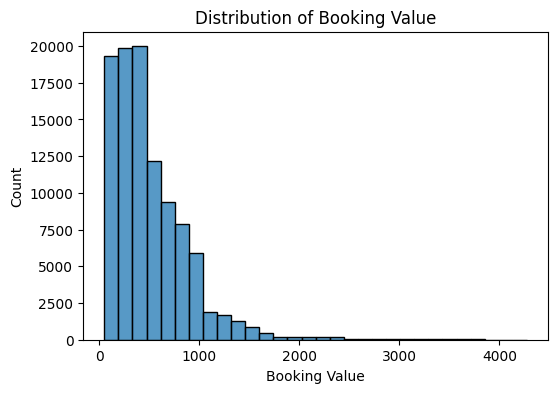

/tmp/ipython-input-1970562047.py:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Ride Distance"].dropna(), shade=True)


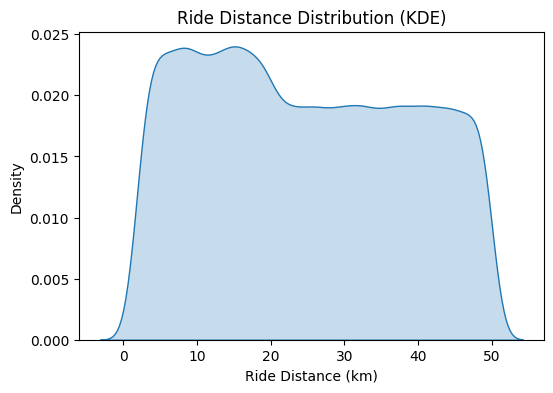

/tmp/ipython-input-1970562047.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Driver Ratings"].dropna(), shade=True)


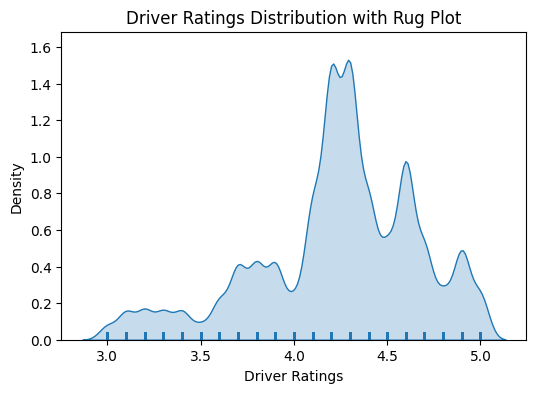

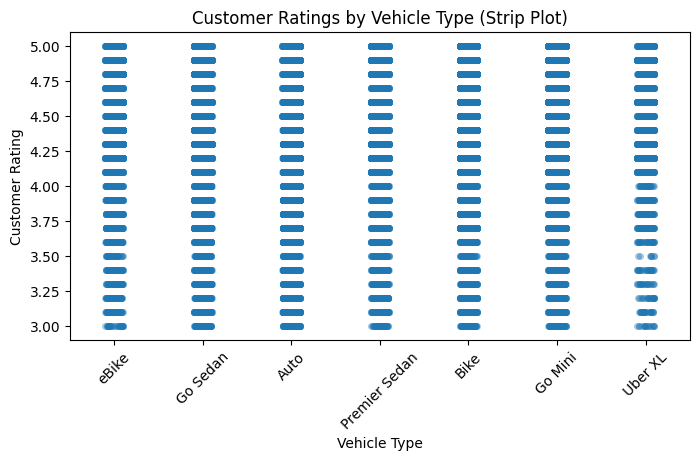

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.8% of the points cannot be plac

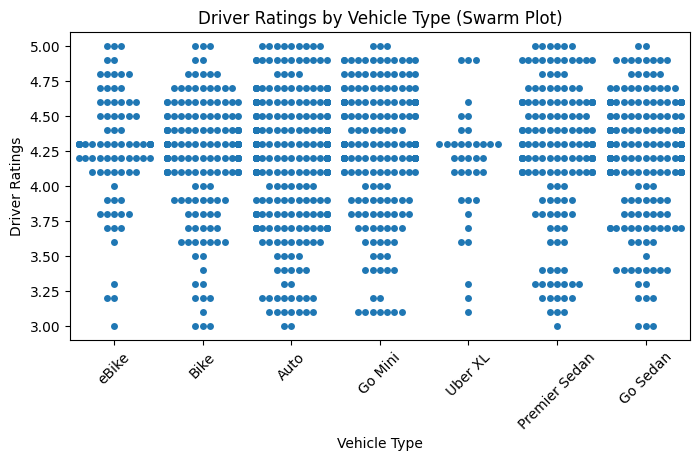

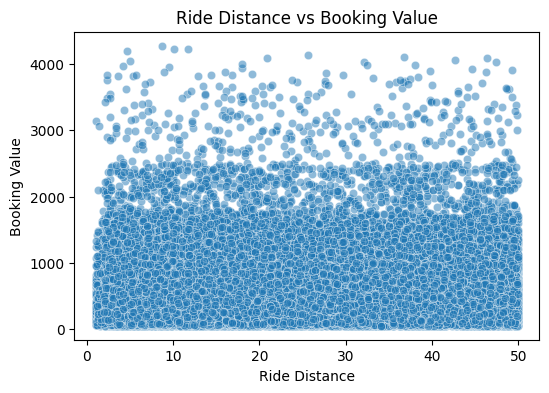

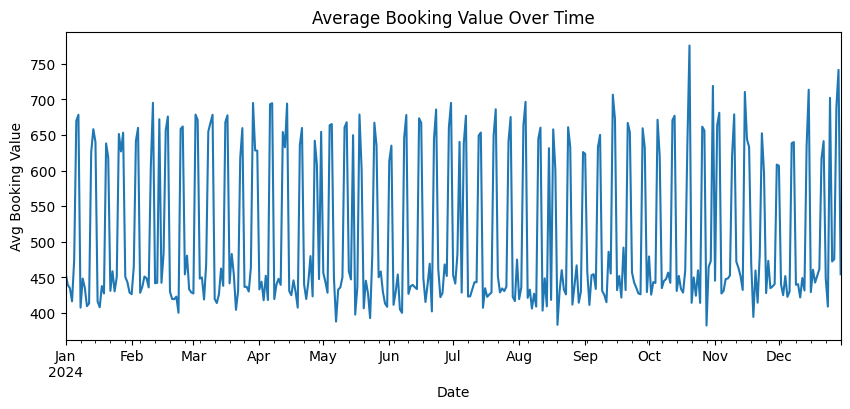

In [2]:
# Step 1: Install & Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("/content/ncr_ride_bookings.csv")
print(df.head())

# Step 3: Data Inspection
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Step 4: Identify Categorical & Continuous Variables
categorical_cols = ["Booking Status", "Vehicle Type", "Payment Method"]
continuous_cols = ["Booking Value", "Ride Distance", "Driver Ratings", "Customer Rating"]

# Step 5: Categorical Data Visualizations
# 1. Bar Chart – Booking Status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Booking Status", order=df["Booking Status"].value_counts().index)
plt.title("Booking Status Distribution")
plt.xticks(rotation=45)
plt.show()

# 2. Pie Chart – Vehicle Type
plt.figure(figsize=(6,6))
df["Vehicle Type"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Vehicle Type Share")
plt.ylabel("")
plt.show()

# Step 6: Continuous Data Visualizations
# 1. Histogram – Booking Value
plt.figure(figsize=(6,4))
sns.histplot(df["Booking Value"].dropna(), bins=30, kde=False)
plt.title("Distribution of Booking Value")
plt.xlabel("Booking Value")
plt.show()

# 2. KDE Plot – Ride Distance
plt.figure(figsize=(6,4))
sns.kdeplot(df["Ride Distance"].dropna(), shade=True)
plt.title("Ride Distance Distribution (KDE)")
plt.xlabel("Ride Distance (km)")
plt.show()

# 3. Rug Plot + KDE for Driver Ratings
plt.figure(figsize=(6,4))
sns.kdeplot(df["Driver Ratings"].dropna(), shade=True)
sns.rugplot(df["Driver Ratings"].dropna())
plt.title("Driver Ratings Distribution with Rug Plot")
plt.xlabel("Driver Ratings")
plt.show()

# 4. Strip Plot – Customer Rating by Vehicle Type
plt.figure(figsize=(8,4))
sns.stripplot(data=df, x="Vehicle Type", y="Customer Rating", jitter=True, alpha=0.4)
plt.title("Customer Ratings by Vehicle Type (Strip Plot)")
plt.xticks(rotation=45)
plt.show()

# 5. Swarm Plot – Driver Ratings by Vehicle Type (sampled for speed)
plt.figure(figsize=(8,4))
sns.swarmplot(data=df.sample(2000), x="Vehicle Type", y="Driver Ratings")
plt.title("Driver Ratings by Vehicle Type (Swarm Plot)")
plt.xticks(rotation=45)
plt.show()

# 6. Scatter Plot – Ride Distance vs Booking Value
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Ride Distance", y="Booking Value", alpha=0.5)
plt.title("Ride Distance vs Booking Value")
plt.show()

# 7. Line Plot – Avg Booking Value over Time
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
daily_revenue = df.groupby("Date")["Booking Value"].mean().dropna()

plt.figure(figsize=(10,4))
daily_revenue.plot()
plt.title("Average Booking Value Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Booking Value")
plt.show()

In [ ]:
df.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,24644,22868.000000,16763.000000,4362.0,1515.0,16763.000000,16763.000000,15248.000000,15248.000000
mean,2024-07-01 19:18:52.997890048,8.455711,29.069164,1.0,1.0,508.210881,24.812310,4.229551,4.409162
min,2024-01-01 00:00:00,2.000000,10.000000,1.0,1.0,50.000000,1.020000,3.000000,3.000000
25%,2024-04-03 00:00:00,5.300000,21.600000,1.0,1.0,235.000000,12.675000,4.100000,4.200000
50%,2024-07-03 00:00:00,8.300000,28.600000,1.0,1.0,415.000000,23.880000,4.300000,4.500000
75%,2024-10-01 00:00:00,11.300000,36.700000,1.0,1.0,690.000000,37.035000,4.600000,4.800000
max,2024-12-30 00:00:00,20.000000,45.000000,1.0,1.0,4277.000000,50.000000,5.000000,5.000000
std,NaN,3.786720,8.886820,0.0,0.0,395.034753,14.034655,0.437135,0.436257
